In [0]:
#Importing mlflow and machine learning runs 
import mlflow
mlflow.pyspark.ml.autolog()

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1682001753000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-1.csv', name='Occupancy_Detection_Data-1.csv', size=50968, modificationTime=1677690222000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677689201000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1675602526000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-2.zip', name='accounts-2.zip', size=5297592, modificationTime=1675603540000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-3.zip', name='accounts-3.zip', size=5297592, m

In [0]:
FaultData= spark.read.csv("/FileStore/tables/FaultDataset.csv/",
                              header= "true",
                              inferSchema="true",
                               sep=",")
FaultData.show()     

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|0.3503125|0.3496875|     0.35|0.3459375|   0.3475|0.3459375| 0.341875|0.3434375|    0.355|0.3553125|0.3459375|   0.3525|   0.3575|0.3590625|  0.35875|0.3484375|0.3590625|     0.35|0.3559375|0.3490625|             0|
|0.5090625| 0.484375| 0.046875| 0.071875|     0.06|0.0634375|   0.0575|0.0546875|0.0559375| 0.058125|0.0628125| 0.065625|0.0640625|0

In [0]:
FaultData1=FaultData.dropna()
FaultData1.show()

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|0.3503125|0.3496875|     0.35|0.3459375|   0.3475|0.3459375| 0.341875|0.3434375|    0.355|0.3553125|0.3459375|   0.3525|   0.3575|0.3590625|  0.35875|0.3484375|0.3590625|     0.35|0.3559375|0.3490625|             0|
|0.5090625| 0.484375| 0.046875| 0.071875|     0.06|0.0634375|   0.0575|0.0546875|0.0559375| 0.058125|0.0628125| 0.065625|0.0640625|0

In [0]:
# to count the numbers of studies in the datatset

from pyspark.sql.functions import countDistinct

FaultData2 = FaultData1.count()
print("Total Entries:", FaultData2)

Total Entries: 9292


In [0]:
FaultData3 = FaultData1.select("fault_detected")
FaultData3.show()

+--------------+
|fault_detected|
+--------------+
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
|             0|
+--------------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import count

FaultData3 = FaultData1.groupBy("fault_detected") \
                      .agg(count("*").alias("count")) \
                      .orderBy("fault_detected")

FaultData3.show()


+--------------+-----+
|fault_detected|count|
+--------------+-----+
|             0| 4646|
|             1| 4646|
+--------------+-----+



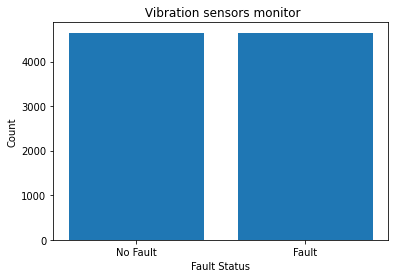

In [0]:
import matplotlib.pyplot as plt

# Define data
fault_counts = [4646, 4646]
labels = ['No Fault', 'Fault']

# Create bar plot
plt.bar(labels, fault_counts)

# Add title and axis labels
plt.title(' Vibration sensors monitor')
plt.xlabel('Fault Status')
plt.ylabel('Count')

# Display plot
plt.show()


In [0]:
from pyspark.ml.feature import RFormula

Preprocess = RFormula(formula="fault_detected ~ .")
FaultData1 = Preprocess.fit(FaultData1).transform(FaultData1)
FaultData1.show()



2023/04/24 09:55:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'eff9ec2e1adc4ae9a05dc0539a1bc385', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|            features|label|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+
|0.3

In [0]:
# Split data into training and test sets
(trainingDF, testDF) =FaultData1.randomSplit([0.7, 0.3], seed=100)

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
# Define Decision Tree model
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

In [0]:
#training the model
model = dt.fit(trainingDF)


2023/04/24 09:55:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b44d868830f84860999ea9ba043ac88d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/24 09:55:34 WARNING mlflow.pyspark.ml: Model inputs contain unsupported Spark data types: [StructField('features', VectorUDT(), True)]. Model signature is not logged.
2023/04/24 09:55:43 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/24 09:56:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."


In [0]:
Prediction = model.transform(testDF)
Prediction.show()

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------+--------------------+----------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|            features|label| rawPrediction|         probability|prediction|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------+--------------------+----------+
|0.0253125| 0.039375|0.0528125| 0.056875|   0.0725| 0.041875|0.5109375|0.5628125|    0.605|   0.6025|0.6259375|      0.6|0.6090

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#Use evaluator to make predict accuracy of data test

evaluator= MulticlassClassificationEvaluator (labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(Prediction)
print("Accuracy =%g " %(accuracy))


Accuracy =0.952432 


In [0]:
#Create a grid parameter
from pyspark.ml.tuning import ParamGridBuilder
parameters = ParamGridBuilder()\
.addGrid(dt.impurity, ["gini", "entropy"])\
.addGrid(dt.maxDepth, [2,5,7])\
.addGrid(dt.maxBins, [16,32,64])\
.build()

In [0]:
from pyspark.ml.tuning import TrainValidationSplit
tvs = TrainValidationSplit()\
.setSeed(100)\
.setTrainRatio(0.75)\
.setEstimatorParamMaps(parameters)\
.setEstimator(dt)\
.setEvaluator(evaluator)

In [0]:
#Training model using grid search
gridsearchModel = tvs.fit(trainingDF)

2023/04/24 09:56:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '310cfbf9f64e445fbb11632e13b01efb', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/24 09:57:55 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/24 09:58:54 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#finding the best perfroming model
bestModel = gridsearchModel.bestModel

print("Parameters for the best model:")
print("MaxDepth Parameter: %g" %bestModel.getMaxDepth())
print("Impurity Parameter: %s" %bestModel.getImpurity())
print("MaxBins Parameter: %g" %bestModel.getMaxBins())

Parameters for the best model:
MaxDepth Parameter: 7
Impurity Parameter: entropy
MaxBins Parameter: 64


In [0]:
evaluator.evaluate(bestModel.transform(testDF))

Out[19]: 0.961081081081081

In [0]:
import mlflow
logged_model = 'runs:/02333a361f564097ba4bcd7d53a1de70/best_model'

# Load model
loaded_model = mlflow.spark.load_model(logged_model)

# Perform inference via model.transform()
loaded_predictions = loaded_model.transform(testDF)

loaded_predictions.show()

2023/04/24 09:59:50 INFO mlflow.spark: 'runs:/02333a361f564097ba4bcd7d53a1de70/best_model' resolved as 'dbfs:/databricks/mlflow-tracking/719591535118584/02333a361f564097ba4bcd7d53a1de70/artifacts/best_model'
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+-------------+--------------------+----------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|            features|label|rawPrediction|         probability|prediction|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------